In [41]:
def min_changes(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Create a matrix to store the minimum changes
    matrix = [[0] * len_str2 for _ in range(len_str1)]

    # Initialize the matrix with the cost of converting an empty string to str2
    for i in range(len_str2):
        matrix[0][i] = i

    # Initialize the matrix with the cost of converting str1 to an empty string
    for i in range(len_str1):
        matrix[i][0] = i

    # Fill in the matrix based on the minimum cost of transformations
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,      # Deletion
                matrix[i][j - 1] + 1,      # Insertion
                matrix[i - 1][j - 1] + cost  # Substitution
            )

    # The bottom-right cell of the matrix contains the minimum changes
    return matrix[-1][-1]

# Example usage:
str1 = "kitten"
str2 = "sitting"
result = min_changes(str1, str2)
print(f"The minimum number of changes to transform '{str1}' into '{str2}' is: {result}")


The minimum number of changes to transform 'kitten' into 'sitting' is: 3


In [310]:
import numpy as np

detections = np.load("./data/detections_4.npy", allow_pickle=True).item()

success = 0
sucess_inclued = 0
total = len(detections.keys())

keys = []

for key in detections.keys():
    desired = key.split(".")[0]
    detected = detections[key]
    #detected = [a for a, _ in detections[key]]
    if desired in detected:
        success = success + 1
    if desired.replace(' ', '').replace('-', '') in [a.replace(' ', '').replace('-', '') for a in detected]:
        sucess_inclued = sucess_inclued + 1
    c = []
    for a in detected:
        c.append(min_changes(a, desired))
    if len(c) > 0:
        keys.append(min(c))
    else:
        keys.append(-1)
print(f'Total: {total}, Correct: {success}, Correct with include: {sucess_inclued}, Delta: {sucess_inclued - success}')
print(f' Percentage: {success / total * 100} %, Percentage includes: {sucess_inclued / total * 100} %')


Total: 1703, Correct: 969, Correct with include: 976, Delta: 7
 Percentage: 56.89958896065767 %, Percentage includes: 57.310628302994715 %


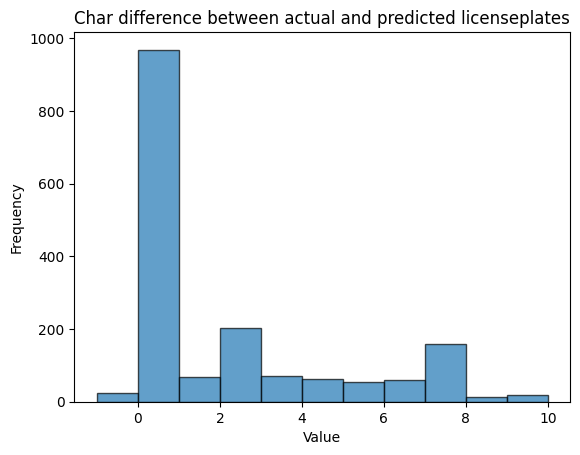

In [312]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(keys, bins=range(min(keys), max(keys) + 1), edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Char difference between actual and predicted licenseplates')

# Show the plot
plt.show()

In [317]:
import os
import ipywidgets as widgets
from IPython.display import display, Image
from ipywidgets import interact, fixed, Button, HBox, VBox, Label


class ImageBrowser:
    def __init__(self, folder1, folder2, data_dict):
        self.folder1 = folder1
        self.folder2 = folder2
        self.data_dict = data_dict
        self.matching_images = self.get_matching_images()
        self.current_index = 0

        self.prev_button = Button(description='Previous', icon='arrow-left')
        self.next_button = Button(description='Next', icon='arrow-right')

        self.prev_button.on_click(self.prev_image)
        self.next_button.on_click(self.next_image)

        self.title_label = Label(value="")
        self.wi1 = widgets.Image(format='png', layout=widgets.Layout(max_height='400px'))  # Adjust max_height as needed
        self.wi2 = widgets.Image(format='png', layout=widgets.Layout(max_height='200px'))  # Adjust max_height as needed

        display(VBox([HBox([self.prev_button, self.next_button]), self.title_label, HBox([self.wi1, self.wi2])]))

        self.update_images()

    def get_matching_images(self):
        images_folder1 = [f for f in os.listdir(self.folder1) if f.endswith('.jpg') or f.endswith('.png')]
        images_folder2 = [f for f in os.listdir(self.folder2) if f.endswith('.jpg') or f.endswith('.png')]

        non_matching = sorted([key for key in self.data_dict.keys() if key.split('.')[0] not in self.data_dict[key]])

        return non_matching

    def load_images(self, index):
        image_name = self.matching_images[index]

        path1 = os.path.join(self.folder1, image_name)
        path2 = os.path.join(self.folder2, image_name)

        img1 = open(path1, 'rb').read()
        img2 = open(path2, 'rb').read()

        title_text = f"Original: {image_name}, Predicted: {self.data_dict[image_name]}"
        self.title_label.value = title_text
        self.wi1.value = img1
        self.wi2.value = img2

    def update_images(self):
        self.load_images(self.current_index)

    def prev_image(self, _):
        self.current_index = (self.current_index - 1) % len(self.matching_images)
        self.update_images()

    def next_image(self, _):
        self.current_index = (self.current_index + 1) % len(self.matching_images)
        self.update_images()


In [318]:
folder_path1 = './data/img_filter_res_4'
folder_path2 = './data/plate_conv_res_4'
detections = np.load("./data/detections_4.npy", allow_pickle=True).item()
#destructured_dict = {key: [value_tuple[0] for value_tuple in value] if value else [] for key, value in detections.items()}

browser = ImageBrowser(folder_path1, folder_path2, detections)



In [205]:
non_matching = [key for key in detections.keys() if key.split('.')[0] not in detections[key]]
print(len(non_matching))
print(len(detections.keys()))

2218
2853


In [204]:
detections

{'KGV-725.jpg': ['KGY7I'],
 'RMR-294.jpg': ['FP MP-294'],
 'IRG-756.jpg': ['FZBS'],
 'IHX-268.jpg': ['IHX-268'],
 'P-04356 22.jpg': ['FI'],
 'OT 93-62.jpg': ['T'],
 'BPO-074.jpg': ['', ''],
 'AA DK-403.jpg': [''],
 'ECY-610.jpg': ['RYL-685'],
 'DAP-285.jpg': ['LAF2B'],
 'SXA-869.jpg': ['', 'SKA-869'],
 'EVD-244.jpg': ['L', 'LL'],
 'HHN-375.jpg': ['II ZZ-119', 'II ZZ-119', 'IIIS5'],
 'RIN-280.jpg': ['FI II-280', 'FI II-280'],
 'PFW-641.jpg': ['FFG41'],
 'AA CQ-859.jpg': ['', '', '', '', ''],
 'SMC-199.jpg': ['SM CI-991'],
 'PGG-419.jpg': ['FGG-419'],
 'FHH-848.jpg': ['FHH-848'],
 'HNR-738.jpg': ['BH NR-738'],
 'TAX-256.jpg': ['TK25S'],
 'Z-11888 21.jpg': [''],
 'ROK-603.jpg': ['FCI-803'],
 'GRW-954.jpg': ['EG FW-954'],
 'KHA-840.jpg': ['KI IA-84U'],
 'AA KB-231.jpg': ['AAKB231I'],
 'DUM-014.jpg': ['DUM-014'],
 'GKG-499.jpg': ['GRG-499'],
 'CBR-085.jpg': ['CEF-085'],
 'RTY-640.jpg': ['RTV-640', ''],
 'PDN-577.jpg': ['FE'],
 'JLJ-943.jpg': ['JLJ-943', 'ILJ-943'],
 'GEM-611.jpg': ['LQ EW-6